## Advanced Lane Finding Project

The goals / steps of this project are the following:

* **Compute the camera calibration matrix and distortion coefficients given a set of chessboard image.**
* **Apply a distortion correction to raw images.**
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


### Extract object points and image points for camera calibration.

In [44]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Prepare object points
nx = 9 # number of inside corners in x
ny = 6 # number of inside corners in y
objp = np.zeros((ny * nx, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)  # x and y cordinates.

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

original_images = []
chesspoints_images = []

# Make a list of calibration images
images = glob.glob('camera_cal/c*.jpg')

# Step through the list and search for chessboard corners
for idx, filename in enumerate(images):
    image = cv2.imread(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, add object points, image points
    if ret == True:
        # print('Imagename with corner found: {}'.format(filename))
        
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        chesspoints_image = cv2.drawChessboardCorners(image.copy(), (nx, ny), corners, ret)
        chesspoints_images.append(chesspoints_image)
        original_images.append(image)
        
print('Images with all chessboard corners found: {}'.format(len(chesspoints_images)))
        

Images with all chessboard corners found: 17


Text(0.5,1,'With detected chessboard points Image')

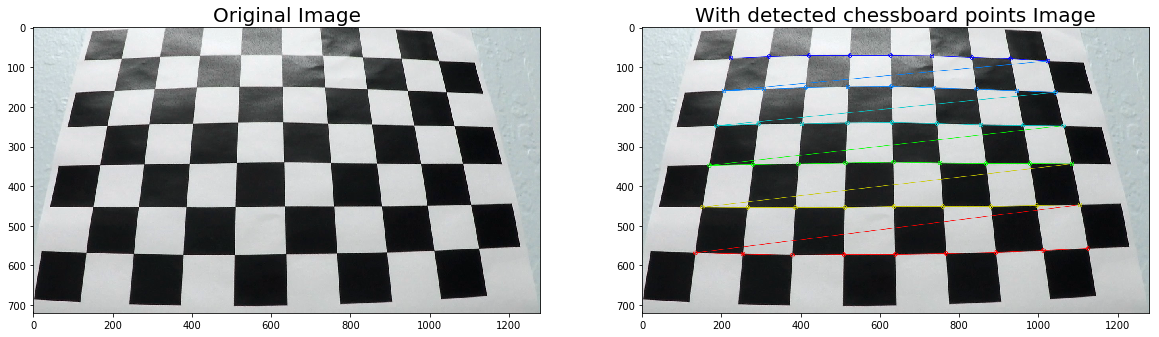

In [46]:
# Visualize Image with detected chessboard points
index = 2
original_image = original_images[index]
chesspoints_image = chesspoints_images[index]

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(original_image)
axes[0].set_title('Original Image', fontsize=20)
axes[1].imshow(chesspoints_image)
axes[1].set_title('With detected chessboard points Image', fontsize=20)

### Calibrate, calculate distortion coefficients, and test undistortion on an image

In [ ]:
# Do camera calibration given object points and image points
img_size = (original_image.shape[1], original_image.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
dst = cv2.undistort(original_image, mtx, dist, None, mtx)

cv2.imwrite('output_images/test_dist_image.jpg', original_image)
cv2.imwrite('output_images/test_undist_image.jpg', dst)

# print(mtx)
# print(dist)

# Save the camera calibration result for later use 
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle, open("camera_cal/camera_calibration.p", "wb"))

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(original_image)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=20)